# H2O.ai GPU Edition Machine Learning $-$ Multi-GPU GLM Demo

### In this demo, we will train 4000 regularized linear regression models (aka Generalized Linear Models or GLMs) on the U.S. Census dataset, with the goal to predict the earned income of a person, given approximately 10000 features such as gender, age, occupation, zip code, etc.

### The dataset is about 2GB in memory (50k rows, 10k cols, single-precision floating-point values), so it easily fits onto the GPU memory.

### By using multiple GPUs, we are able to speed up this process significantly, and can train about 40 models per second (on a DGX-1 with 8 GPUs) vs 1 model per second on dual-Xeon server.

### Import Dependencies

In [1]:
import h2o4gpu
import h2o4gpu.util.import_data as io
from h2o4gpu.util.testing_utils import RunAnimation, RunH2Oaiglm
import h2o4gpu.util.metrics as metrics
from tabulate import tabulate
import pandas as pd
import os

In [2]:
"""
Import Data for H2O GPU Edition

This function will read in data and prepare it for H2O4GPU's GLM solver

Parameters
----------
data_path : str
             A path to a dataset (The dataset needs to be all numeric)
use_pandas : bool
              Indicate if Pandas should be used to parse
intercept : bool
              Indicate if intercept term is needed
valid_fraction : float
                  Percentage of dataset reserved for a validation set
classification : bool
                  Classification problem?
Returns
-------
If valid_fraction > 0 it will return the following:
    train_x: numpy array of train input variables
    train_y: numpy array of y variable
    valid_x: numpy array of valid input variables
    valid_y: numpy array of valid y variable
    family : string that would either be "logistic" if classification is set to True, otherwise "elasticnet"
If valid_fraction == 0 it will return the following:
    train_x: numpy array of train input variables
    train_y: numpy array of y variable
    family : string that would either be "logistic" if classification is set to True, otherwise "elasticnet"
"""
file = os.path.join(os.getcwd(), "ipums.feather")
if not os.path.exists(file):
   !wget https://s3.amazonaws.com/h2o-public-test-data/h2o4gpu/open_data/ipums.feather
    
train_x,train_y,valid_x,valid_y,family=io.import_data(data_path="ipums.feather", 
                                                        use_pandas=False, 
                                                        intercept=False,
                                                        valid_fraction=0.2,
                                                        classification=False)

Reading Data with Feather
(55776, 9733)
Original m=55776 n=9732
Size of Train rows=44621 & valid rows=11155
Size of Train cols=9732 valid cols=9732


### Train 4000 Elastic Net Models (5-fold cross-validation, 8 $\alpha$ values, 100 $\lambda$ values)

In [ ]:
import subprocess
import concurrent.futures
from concurrent.futures import ProcessPoolExecutor

lambda_min_ratio=1E-9
n_folds=5
n_alphas=8
n_lambdas=100
n_gpus=-1 # -1 means use all GPUs
fit_intercept = True

arg = train_x,train_y,valid_x,valid_y, family, fit_intercept, lambda_min_ratio, n_folds, n_alphas, n_lambdas, n_gpus
from threading import Thread
background_thread = Thread(target=RunH2Oaiglm, args=(arg,))
background_thread.start()
#futures = []
#Executor = ProcessPoolExecutor(max_workers=1)
#futures.append(Executor.submit(RunH2Oaiglm, arg)) ## run in separate process

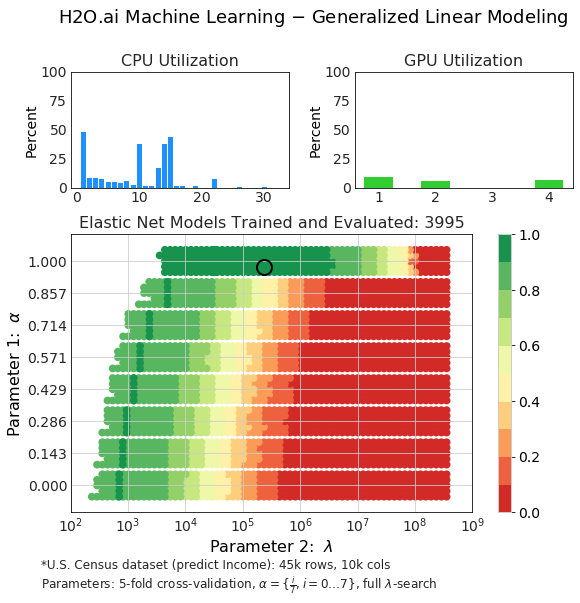

In [ ]:
import time
time.sleep(2) # sleep in case glm takes time to get going and animation already looks for error.txt file.
RunAnimation(n_gpus)
#concurrent.futures.wait(futures)